# ObsID : 0945070132, SRCNUM : 1, Instru : Combined
**Simbad :** Gamma-ray Source *4FGL J0333.4-2705* (https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%4016018930&Name=4FGL%20J0333.4-2705&submit=submit).

## ESASky

https://sky.esa.int/esasky/?target=53.383375%20-27.15480555555556&hips=XMM-Newton+EPIC+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr

``EPIC Stack``

- Stack Catalogue name : 4XMMs J033331.9-270916
- IAU name : 4XMM J033331.9-270916
- RA : 03h 33m 31.917s
- DEC : -27° 09' 16.80"

``GAIA``

- Designation : Gaia DR3 5084568549147089792
- RA : 03h 33m 31.933s
- DEC : -27° 09' 16.53"
- Parallax : 0.1954 mas
- G : 19.7505
- BP-RP = 0.8773

``eROSITA``

- IAUNAME : 1eRASS J033331.8-270916
- RA : 03h 33m 31.807s
- DEC : -27° 09' 16.29"

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


The expected reduce Chi-squared value of a perfect fit is **≈ 1** with: ``reduce Chi-squared = Chi-squared/(n_bins-n_parameters)``.

## Load files

In [3]:
AllData.clear()
spec = Spectrum(glob.glob('ObsID*_SRCNUM*spectrum_combined_grp_chi.fits')[0])


1 spectrum  in use
 
Spectral Data File: ObsID0945070132_SRCNUM1_source_spectrum_combined_grp_chi.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.200e-01 +/- 4.237e-03 (90.8 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-54
  Telescope: XMM Instrument: EPIC  Channel Type: PI
  Exposure Time: 1.379e+04 sec
 Using fit statistic: chi
 Using Background File                ObsID0945070132_SRCNUM1_background_spectrum_combined.fits
  Background Exposure Time: 1.379e+04 sec
 Using Response (RMF) File            ObsID0945070132_SRCNUM1_response_combined.rmf for Source 1



In [4]:
print(f"Number of counts = {2.200e-01*1.379e+04} cts")

Number of counts = 3033.8 cts


The number of counts exceeds 100 cts, indicating that the chi-squared test should be a good choice for a goodness-of-fit statistic.

## Plot spectrum

In [5]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.000005 0.8")
Plot("data")
spec.ignore("**-0.2 12.0-**")

     2 channels (1-2) ignored in spectrum #     1
     1 channels (54) ignored in spectrum #     1



(-0.5, 852.5, 652.5, -0.5)

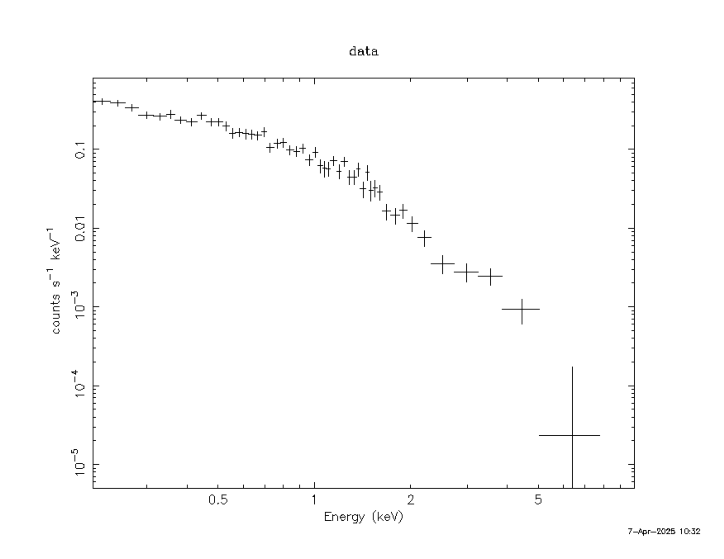

In [6]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model
There are 3 parameters in the ``tbabs*bbody`` model. Here, Chi-squared = 411.3675 using 51 bins, so the **reduce Chi-squared = 8.57**. The value is far from 1 meaning it is a bad fit.

In [7]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
plt.show()
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              1.817345e+12     using 51 bins.

Te

(-0.5, 856.5, 657.5, -0.5)

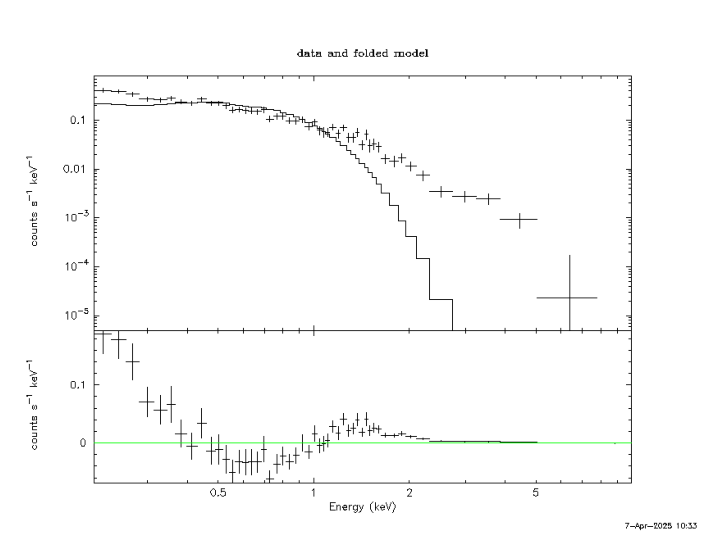

In [8]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model
There are 3 parameters in the ``tbabs*bremss`` model. Here, Chi-squared = 109.1171 using 51 bins, so the **reduce Chi-squared = 2.273**. The value is quite far from 1 meaning it is not a good fit.

In [9]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.667111e+10     using 51 bins.

Test statistic : Chi-Squared              3.667111e+10     using 51 bins.
 Null hypothesis probability of 0.000000e+00 with 48 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
2261.41      26.9197      -3      0.170427       27.3922   3.10267e-05
2014.94      1.19057e+06   0    0.00670242       13.0273   3.25684e-05
1762.93      2.21001e+06  -1    0.00200721       1.79506   4.92556e-05


(-0.5, 850.5, 659.5, -0.5)

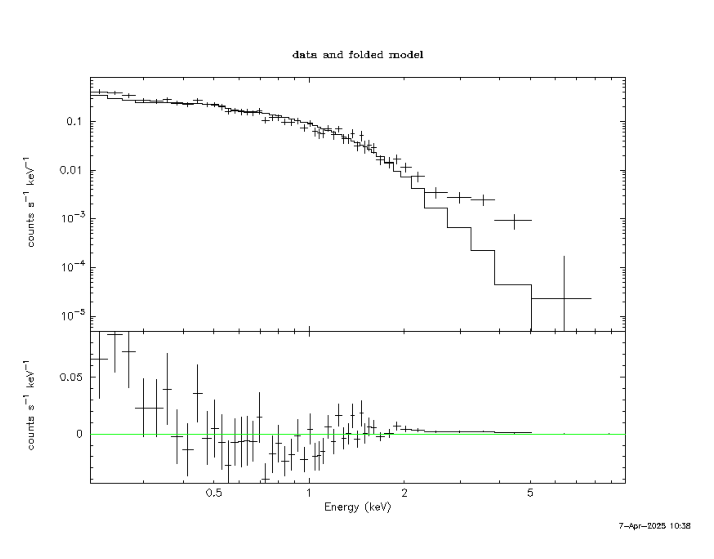

In [10]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model
There are 4 parameters in the ``tbabs*apec`` model. Here, Chi-squared = 1146.560 using 51 bins, so the **reduce Chi-squared = 24.383**. The value is far from 1 meaning it is a bad fit.

In [11]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              2.611359e+09     using 51 bins.

Test statistic : Chi-Squared              2.611359e+09     using 51 bins.
 Null hypothesis probability of 0.000000e+00 with 48 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
1673.36      99.8818      -3      0.775771      0.742813   

(-0.5, 852.5, 656.5, -0.5)

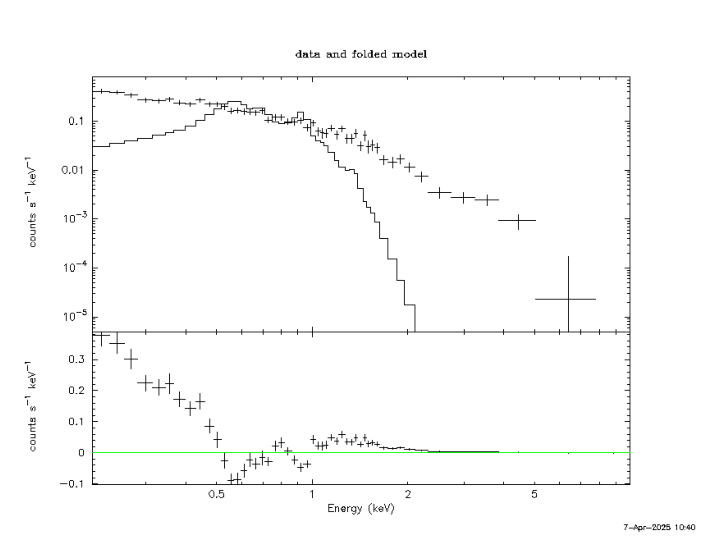

In [12]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model
There are 3 parameters in the ``tbabs*powerlaw`` model. Here, Chi-squared = 40.9886 using 51 bins, so the **reduce Chi-squared = 0.854**. The value is close to 1 meaning it is a good fit.

Second Chi-squared value closest to 1.

In [13]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.061334e+11     using 51 bins.

Test statistic : Chi-Squared              3.061334e+11     using 51 bins.
 Null hypothesis probability of 0.000000e+00 with 48 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
2129.68      23.9459       0     0.0160489       1.20418   1.74128e-05
1587.25      3.11116e+06  -1    0.00769055       2.16136   3.62260e-05
1388.15      3.75351e+06  -1   0.000617473       3.45792   0.00011490

(-0.5, 852.5, 659.5, -0.5)

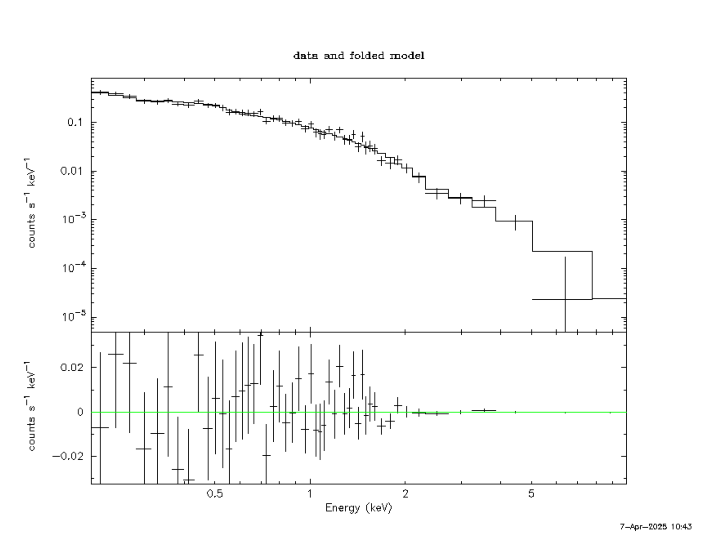

In [14]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body + Powerlaw model
There are 5 parameters in the ``tbabs*(bbody+powerlaw)`` model. Here, Chi-squared = 40.9886 using 51 bins, so the **reduce Chi-squared = 0.891**. The value is close to 1 meaning it is a good fit.

Chi-squared value closest to 1.

In [15]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbodypowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.520888e+12     using 51 bins.

Test statistic : Chi-Squared              3.520888e+12     using 51 bins.
 Null hypothesis probability of 0.000000e+00 with 46 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
2457.41      596029  

(-0.5, 854.5, 656.5, -0.5)

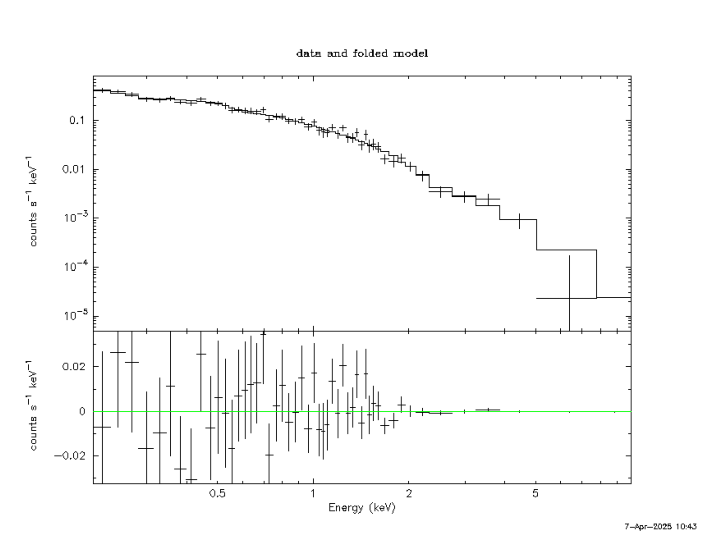

In [16]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_Spectrum_bbodypowerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremss + Powerlaw model
There are 5 parameters in the ``tbabs*(bremss+powerlaw)`` model. Here, Chi-squared = 39.2177 using 51 bins, so the **reduce Chi-squared = 0.852**. The value is close to 1 meaning it is a good fit.

Third Chi-squared value closest to 1.

In [17]:
AllModels.clear()
mo = Model("tbabs*(bremss+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsspowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.440842e+11     using 51 bins.

Test statistic : Chi-Squared              5.440842e+11     using 51 bins.
 Null hypothesis probability of 0.000000e+00 with 46 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
1545.95      174961 

(-0.5, 856.5, 657.5, -0.5)

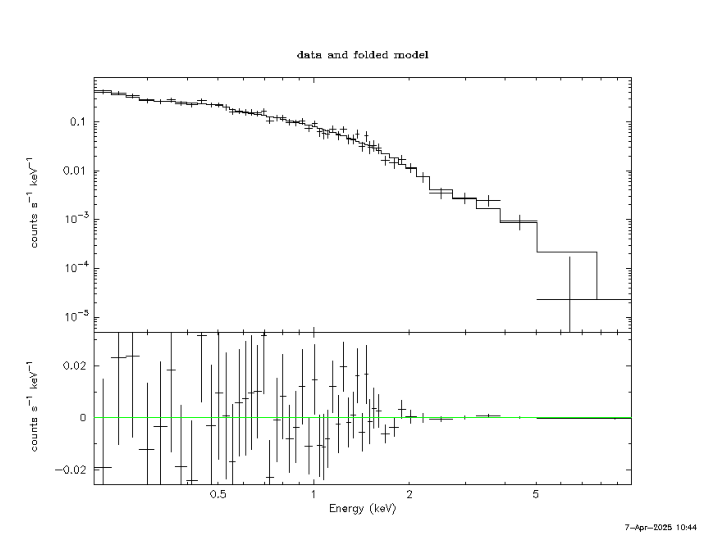

In [18]:
img = plt.imread(glob.glob('ObsID*_SRCNUM*_Spectrum_bremsspowerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :**

- RA =  53.3829856°
- Dec = -27.1546672°

53.38 -27.15

**Column density :** nH = 4e+20 cm^-2

In [19]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"nH = {nH_bbody*10**22} cm^-2")
print()
print(color.BOLD+"bremss"+color.END)
print(f"nH = {nH_bremss*10**22} cm^-2")
print()
print(color.BOLD+"apec"+color.END)
print(f"nH = {nH_apec*10**22} cm^-2")
print()
print(color.BOLD+"powerlaw (Second best fit)"+color.END)
print(f"nH = {nH_powerlaw*10**22} cm^-2")
print()
print(color.BOLD+"bbody+powerlaw (Best fit (bis))"+color.END)
print(f"nH = {nH_powerlaw*10**22} cm^-2")
print()
print(color.BOLD+"bremss+powerlaw (Third best fit)"+color.END)
print(f"nH = {nH_powerlaw*10**22} cm^-2")

The different models give a column density of :

bbody
nH = 1327424.3424739842 cm^-2

bremss
nH = 601994.6263836543 cm^-2

apec
nH = 6.483830728645668e+21 cm^-2

powerlaw (Second best fit)
nH = 1.0676702046822839e+20 cm^-2

bbody+powerlaw (Best fit (bis))
nH = 1.0676702046822839e+20 cm^-2

bremss+powerlaw (Third best fit)
nH = 1.0676702046822839e+20 cm^-2


## Flux
### X-ray flux
- X-ray flux of the best-fitting models ``Black body + Powerlaw`` and ``Powerlaw``: **7.8084e-13 ergs/cm^2/s**.
- X-ray flux of the third best-fitting model ``Bremss + Powerlaw``: **7.8731e-13 ergs/cm^2/s**.

In [20]:
Flux_bp = 7.8731e-13 # ergs/cm^2/s
Flux_pow = 7.8084e-13 # ergs/cm^2/s
print(color.BOLD+"X-ray flux : "+color.END)
print(f"Bremss + Powerlaw : F_x-ray = {Flux_bp} ergs/cm^2/s")
print(f"Powerlaw : F_x-ray = {Flux_pow} ergs/cm^2/s")

X-ray flux : 
Bremss + Powerlaw : F_x-ray = 7.8731e-13 ergs/cm^2/s
Powerlaw : F_x-ray = 7.8084e-13 ergs/cm^2/s


### Optical flux

In [21]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)

G = 19.7505

F = F_optical(G)

print(color.BOLD+"Optical flux : "+color.END+f"F_optical = {F} ergs/cm^2/s")

Optical flux : F_optical = 1.3212630781247998e-13 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [22]:
print(color.BOLD+"X-ray Flux / Optical Flux ratio : "+color.END)
print(f"Bremsstrahlung + Powerlaw : F_x-ray/F_optical = {Flux_bp/F}")
print(f"Powerlaw : F_x-ray/F_optical = {Flux_pow/F}")

X-ray Flux / Optical Flux ratio : 
Bremsstrahlung + Powerlaw : F_x-ray/F_optical = 5.958767886841947
Powerlaw : F_x-ray/F_optical = 5.909799591979863


### Maccacaro et al. paper: log(fx/fv)
https://articles.adsabs.harvard.edu/pdf/1988ApJ...326..680M
- fx : X-ray flux in the 0.3-3.5 keV band in ergs/cm^2/s.
- mv : Visual magnitude.

In [23]:
def logfxfv(fx,mv):
    return np.log10(fx)+(mv/2.5)+5.37

fx_pow = 5.6086e-13 # ergs/cm^2/s
fx_bp = 5.558e-13 # ergs/cm^2/s

logfxfv_pow = logfxfv(fx_pow,G)
logfxfv_bp = logfxfv(fx_bp,G)

print(color.BOLD+"X-ray flux [0.3-3.5] keV : "+color.END)
print(f"Powerlaw : fx = {fx_pow} ergs/cm^2/s")
print(f"Bremsstrahlung + Powerlaw : fx = {fx_bp} ergs/cm^2/s")
print()
print(color.BOLD+"log(fx/fv) : "+color.END)
print(f"Powerlaw : log(fx/fv) = {logfxfv_pow}")
print(f"Bremsstrahlung + Powerlaw : log(fx/fv) = {logfxfv_bp}")

X-ray flux [0.3-3.5] keV : 
Powerlaw : fx = 5.6086e-13 ergs/cm^2/s
Bremsstrahlung + Powerlaw : fx = 5.558e-13 ergs/cm^2/s

log(fx/fv) : 
Powerlaw : log(fx/fv) = 1.0190544676459394
Bremsstrahlung + Powerlaw : log(fx/fv) = 1.0151185424413525


## Luminosity

In [24]:
"""GAIA"""

P_mas = 0.1954
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity_bp = 4*np.pi*Flux_bp*(d_cm)**2 # erg/s
Luminosity_pow = 4*np.pi*Flux_pow*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : d = {d_cm} cm")
print(color.BOLD+"Luminosity :"+color.END)
print(f"Bremss + Powerlaw : L_x-ray = {Luminosity_bp} erg/s")
print(f"Powerlaw : L_x-ray = {Luminosity_pow} erg/s")

"""Alert file"""
Fx = 6*10**(-13)
Lx = 4*np.pi*Fx*(d_cm)**2 # erg/s
print(f"Alert file : L_x = {Lx} erg/s")

(GAIA)
Distance : d = 1.5791709314227227e+22 cm
Luminosity :
Bremss + Powerlaw : L_x-ray = 2.4672542965200984e+33 erg/s
Powerlaw : L_x-ray = 2.4469787566457353e+33 erg/s
Alert file : L_x = 1.8802664489363265e+33 erg/s


## Distance

Let's take a potential range of X-ray luminosity for blazars : **[10^24-10^46] erg/s** to calculate a distance.

In [25]:
Lx_min =10**42 # erg/s
Lx_max =10**46 # erg/s

Fx = 5.6e-13 # ergs/cm^2/s

d_min = np.sqrt(Lx_min/(4*np.pi*Fx))
d_max = np.sqrt(Lx_max/(4*np.pi*Fx))

print(color.BOLD+"Distance :"+color.END)
print(f"d = [{d_min}, {d_max}] cm")

Distance :
d = [3.7696502193256714e+26, 3.7696502193256716e+28] cm
